In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score
import random
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from tqdm.notebook import tqdm

In [2]:
df = pd.read_csv("Group_15_Resampled_Data.csv")

In [3]:
df.head()

,Unnamed: 0,n_address,gaussian_income,gaussian_neighbors,gaussian_weight,gaussian_length,log_count,sigmoid_looped,interaction_count_income,day_of_week,quarter_number,interaction_length_weight,Label-0/1
0,0,0.000000,4.108757,5.841922e-01,-2.698173,-1.517376,9.999995e-07,0.5,2.0,5.0,4.0,2.0,0.0
1,1,0.000000,4.137121,5.841922e-01,-0.651148,-0.895270,9.999995e-07,0.5,2.0,0.0,1.0,2.0,0.0
2,2,0.040003,4.105562,9.999992e-07,0.000000,-0.895270,9.999995e-07,0.5,2.0,3.0,3.0,2.0,0.0
3,3,0.000000,4.101095,5.841922e-01,-1.034121,-0.835088,6.461468e+00,0.5,1.0,6.0,4.0,0.0,0.0
4,4,0.000000,4.147665,5.841922e-01,-2.915540,-0.026262,9.999995e-07,0.5,2.0,3.0,2.0,1.0,0.0


In [4]:
df = df.iloc[:,1:]

In [5]:
df.head()

,n_address,gaussian_income,gaussian_neighbors,gaussian_weight,gaussian_length,log_count,sigmoid_looped,interaction_count_income,day_of_week,quarter_number,interaction_length_weight,Label-0/1
0,0.000000,4.108757,5.841922e-01,-2.698173,-1.517376,9.999995e-07,0.5,2.0,5.0,4.0,2.0,0.0
1,0.000000,4.137121,5.841922e-01,-0.651148,-0.895270,9.999995e-07,0.5,2.0,0.0,1.0,2.0,0.0
2,0.040003,4.105562,9.999992e-07,0.000000,-0.895270,9.999995e-07,0.5,2.0,3.0,3.0,2.0,0.0
3,0.000000,4.101095,5.841922e-01,-1.034121,-0.835088,6.461468e+00,0.5,1.0,6.0,4.0,0.0,0.0
4,0.000000,4.147665,5.841922e-01,-2.915540,-0.026262,9.999995e-07,0.5,2.0,3.0,2.0,1.0,0.0


In [6]:
X = df.drop(['Label-0/1'] , axis = 1)

In [7]:
y = df.iloc[:,-1]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42,test_size = 0.2)

### K - Nearest Neighbors

In [52]:
knn = KNeighborsClassifier() 
k_value = list(np.arange(2,10))
pgaram_grid=dict(n_neighbors=k_value)

In [53]:
#implementing the gridsearchcv to find the best k value
#grid=GridSearchCV(knn, pgaram_grid, scoring='accuracy', return_train_score=True, verbose=1)

In [55]:
#Fitting th grid search with training set
grid=GridSearchCV(knn, pgaram_grid, scoring='accuracy', return_train_score=True, verbose=1).fit(X_train,y_train)
#print(grid)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [64]:
print(grid.best_params_)

{'n_neighbors': 2}


In [65]:
accuracy=grid.best_score_*100
print("Accuracy for our training dataset",accuracy)

Accuracy for our training dataset 93.86590592267466


In [66]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,confusion_matrix

In [68]:
knn_1 = KNeighborsClassifier(n_neighbors = grid.best_params_['n_neighbors']) 
model = knn_1.fit(X_train,y_train)
y_pred = model.predict(X_train)
cm = confusion_matrix(y_train, y_pred)

In [69]:
print(cm)

[[328804   2571]
 [  6413 324820]]


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

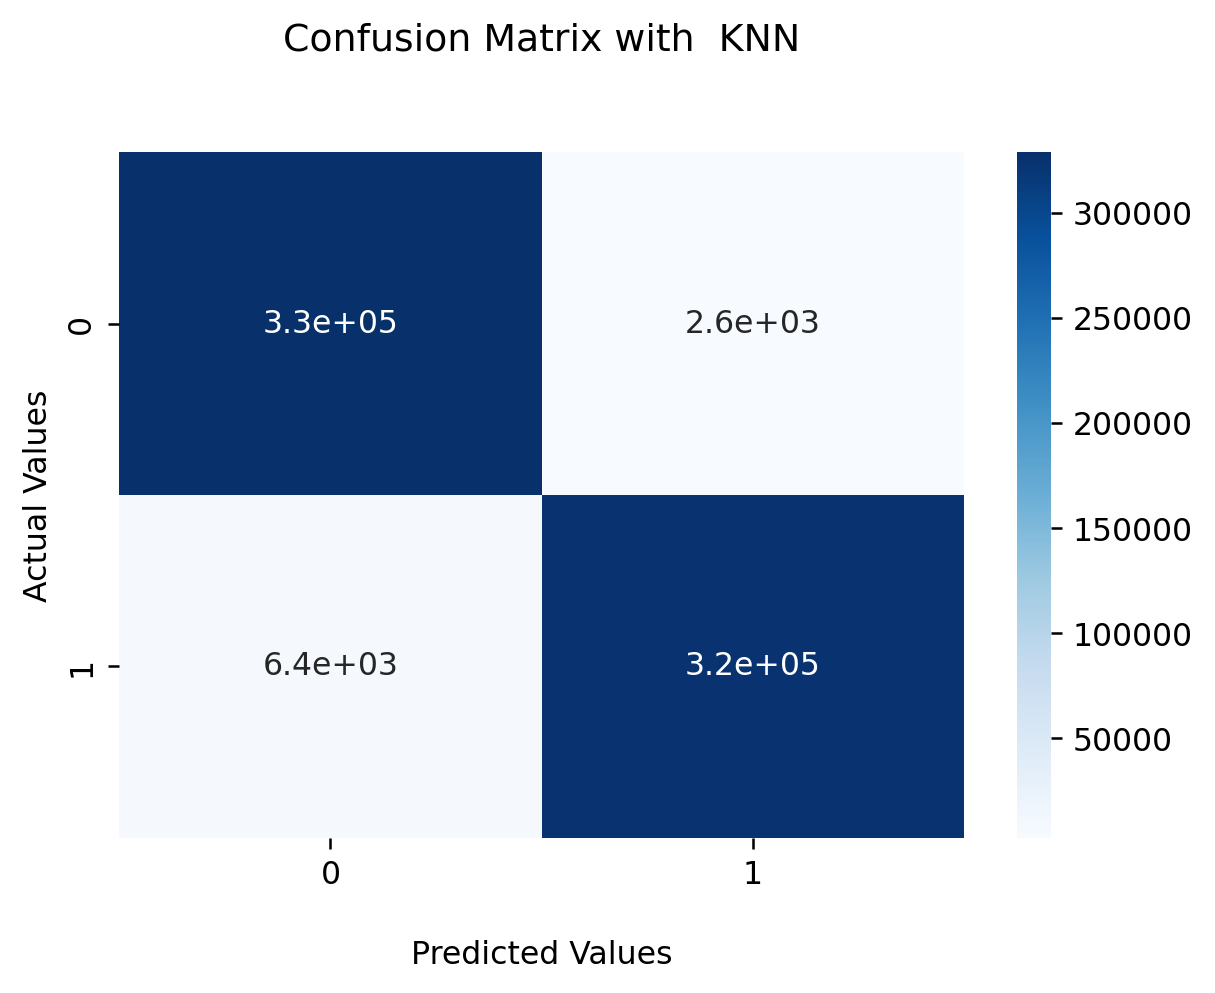

In [71]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with  KNN\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

## Display the visualization of the Confusion Matrix.
plt.show()

In [72]:
### Results of the algorithm

In [73]:
acc = accuracy_score(y_train,y_pred)
print("The accuracy of the model is ", acc*100)

The accuracy of the model is  98.64414555815807


In [74]:
recall=recall_score(y_train,y_pred)
print("The recall score for the applied algorithm",recall)

The recall score for the applied algorithm 0.9806390063791953


In [76]:
import pickle

In [78]:
filename = 'KNN_model.sav'
pickle.dump(knn_1, open(filename,'wb'))